In [35]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

%matplotlib inline

cwd = os.getcwd()

In [36]:
datapath = os.path.join(cwd, "..", "data")

In [37]:
from os import listdir
from os.path import isfile, join

img_rows, img_cols = 28, 28

data_dir = os.path.join(cwd, "..", "data")
model_dir = os.path.join(cwd, "..", "model")

file_list = [f for f in listdir(datapath) if isfile(join(datapath, f))]

file_list_df = pd.DataFrame(file_list, columns = [ "Filename"] )

LABELS = []
for index, row in file_list_df.iterrows():
    if row["Filename"] != '.gitkeep' and row["Filename"] != 'test.pickle' and row["Filename"] != 'train.pickle':
        name_label = os.path.splitext(row["Filename"])[0]
        labl = name_label.split('_')[3]
        LABELS.append(labl) 

LABELS

#LABELS = np.array(
#    map(
#        (lambda x : x.replace(".npy", "")),
#        filter(lambda x: x.endswith('.npy'), os.listdir(data_dir))
#    )
#)

#num_classes = LABELS.shape
num_classes = len(LABELS)
len(LABELS)
#num_classes
#len(LABELS)
#len(LABELS[:,1])
#len(LABELS[1,:])

15

In [46]:
LABELS

['butterfly',
 'cake',
 'cat',
 'dog',
 'dolphin',
 'fish',
 'flower',
 'hot air balloon',
 'key',
 'keyboard',
 'lollipop',
 'star',
 'stethoscope',
 'tree',
 'violin']

In [38]:
def data_prepare():
    datas_path = filter(lambda x: x.endswith('.npy'), os.listdir(data_dir))
    print(datas_path)
    dataset = np.array([]).reshape(0, img_rows * img_cols + 1)
    
    for i, d_path in enumerate(datas_path):
        data = np.load(os.path.join(data_dir, d_path))
        image_size = len(data)
        label = np.ones(image_size, dtype=int) * i
        data = np.concatenate((label[:, np.newaxis], data), axis=1)
        
        np.random.shuffle(data)

        dataset = np.append(dataset, data[0:5000], axis=0)
        print("Load {}".format(d_path))
    
    np.random.shuffle(dataset)
    dataset_len = len(dataset)
    split_x = (int)(dataset_len * 0.9)
    
    print("Dataset {} images".format(dataset_len))
    print("Train {} images".format(split_x))
    print("Test {} images".format(dataset_len - split_x))
    
    print("Write data to pickle files...")
    
    pickle.dump(dataset[0:split_x], open(os.path.join(data_dir, "train.pickle"), "wb"))
    pickle.dump(dataset[split_x:-1], open(os.path.join(data_dir, "test.pickle"), "wb"))
    
    print("Finish")


In [39]:

if not os.path.exists(os.path.join(data_dir, "train.pickle")):
    print("Prepare pickle data")
    data_prepare()

In [40]:
x_train = None
y_train = None
x_test = None
y_test = None

def load_dataset():
    global x_train, y_train, x_test, y_test
    train_data = pickle.load(open(os.path.join(data_dir, "train.pickle"), "rb"))
    test_data = pickle.load(open(os.path.join(data_dir, "test.pickle"), "rb"))
    x_train = train_data[:,1:]
    y_train = train_data[:,0]
    x_test = test_data[:,1:]
    y_test = test_data[:,0]
    print("Load dataset complete")

load_dataset()

Load dataset complete


In [41]:
#LABELS = [ 'stethoscope', 'flower', 'dog', 'key', 'dolphin', 'butterfly', 'cake', 'lollipop', 'key board', 'tree', 'fish', 'ant', 
#         'violin', 'fish', 'cat']

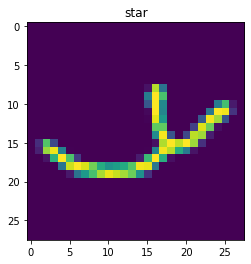

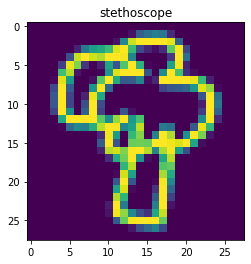

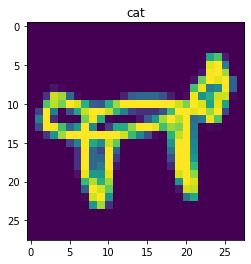

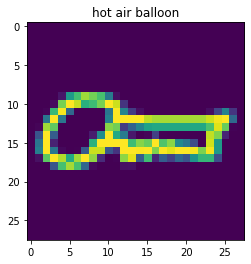

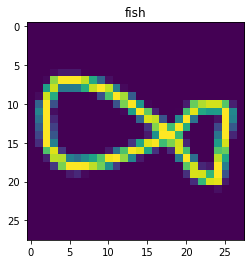

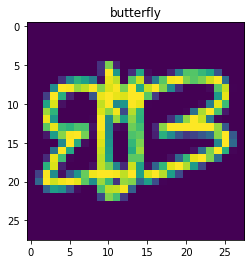

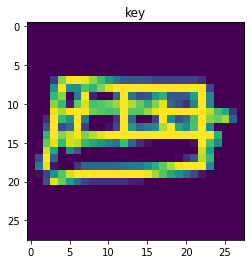

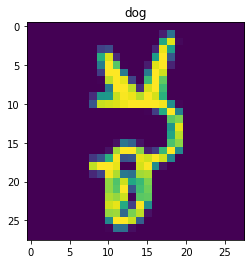

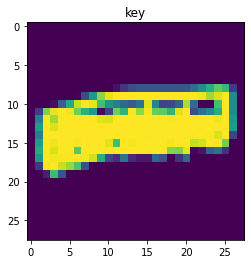

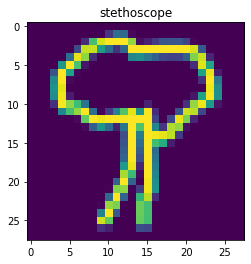

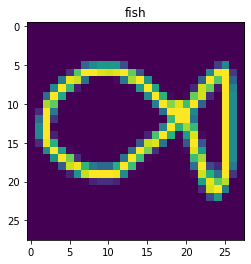

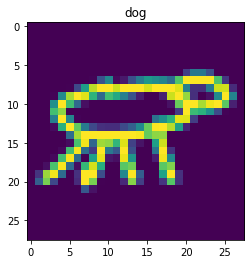

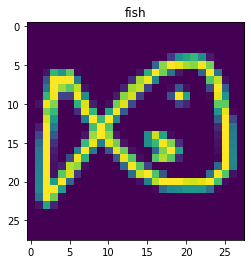

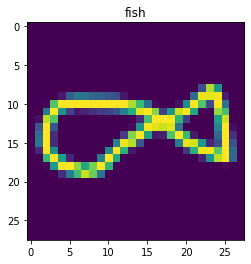

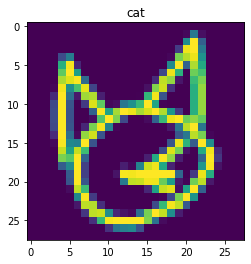

In [42]:
for i in range(num_classes):
    plt.imshow(x_train[i].reshape(28,28))
    plt.title(LABELS[(int)(y_train[i])])
    plt.show()

### Data Prepossing

In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [44]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(y_train_onehot.shape)
print(x_test.shape)
print(y_test_onehot.shape)

(63000, 28, 28, 1)
(63000, 15)
(6999, 28, 28, 1)
(6999, 15)


### Model

In [45]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(
    x_train, y_train_onehot,
    batch_size = 32,
    epochs = 30,
    verbose = 1
)

model.save(os.path.join(model_dir, 'model.h5'))

Epoch 1/30
63000/63000 [==============================] - 88s 1ms/step - loss: 0.7108 - accuracy: 0.7875
Epoch 2/30
63000/63000 [==============================] - 95s 2ms/step - loss: 0.4379 - accuracy: 0.8689
Epoch 3/30
63000/63000 [==============================] - 107s 2ms/step - loss: 0.3549 - accuracy: 0.8920
Epoch 4/30
63000/63000 [==============================] - 94s 1ms/step - loss: 0.3020 - accuracy: 0.9070
Epoch 5/30
63000/63000 [==============================] - 94s 1ms/step - loss: 0.2592 - accuracy: 0.9189
Epoch 6/30
63000/63000 [==============================] - 96s 2ms/step - loss: 0.2289 - accuracy: 0.9279
Epoch 7/30
63000/63000 [==============================] - 103s 2ms/step - loss: 0.1951 - accuracy: 0.9380
Epoch 8/30
63000/63000 [==============================] - 113s 2ms/step - loss: 0.1760 - accuracy: 0.9437
Epoch 9/30
63000/63000 [==============================] - 106s 2ms/step - loss: 0.1591 - accuracy: 0.9485
Epoch 10/30
63000/63000 [==========================

In [47]:
model = keras.models.load_model(os.path.join(model_dir, 'model.h5'))

score = model.evaluate(x_test, y_test_onehot, verbose = 1)
print("\nAccuracy {}".format(score[1]))

6999/6999 [==============================] - 1s 197us/step

Accuracy 0.9074153304100037


6999/6999 [==============================] - 1s 163us/step

[[478   2   3   5   2   1   0   1   0   0   4   1   0   3]
 [  0 495   2   3   3   1   2   1   9   0   0   1   2   4]
 [  0   2 428  49   1   2   3   2   0   0   8   3   3   5]
 [  8   3  57 436   8   2   2   6   0   0   3   5   5   3]
 [  0   3   6   7 389  28   2   6   3   0   4   5   1   2]
 [  0   0   1   6  13 455   0   3   0   0   0   4   1   1]
 [  2   1   1   1   1   1 473  10   2   4   1   4   3   2]
 [  2   2   2   8   2   5   4 435   2   7   1  12   1  14]
 [  1   6   2   3   1   1   0   2 463   1   0   1   1   3]
 [  1   0   2   5   1   1   7  13   0 478   0   1   6   1]
 [  2   0   6   1   3   1   0   1   0   1 446   2   0   1]
 [  3   7   7  15  11   6   6   3   3   0   4 442   3  15]
 [  2   1   4   4   0   1   7   3   0   5   3   3 477   1]
 [  1   4   2   1   1   1   0  12   1   1   2   5   1 456]]


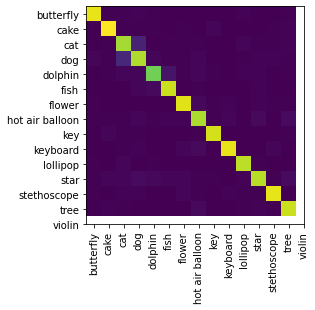

In [48]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(x_test, verbose=1), axis=1)
confusion_matrix = confusion_matrix(y_test.astype(int), y_pred)

print()
print(confusion_matrix)

plt.imshow(confusion_matrix, interpolation='nearest')
plt.xticks(np.arange(0,num_classes), LABELS, rotation=90)
plt.yticks(np.arange(0,num_classes), LABELS)

plt.show()